#  <center><u>**` K-NEAREST NEIGHBHOUR`**</u></center>

The `k-nearest neighbors (KNN) algorithm` is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve `both classification and regression problems`. However, it is more widely used in classification problems in the industry

It is also called a `**lazy learner algorithm**` because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset i.e it classifies that data into a category that is much similar to the new data.

In [2]:
# Import usefull python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing of the dataset 

dataset = pd.read_csv("Social_Network_Ads.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Data Dict

1. User ID : The ID of the user 
2. Gender: male or female
3. 3Age: The age of the user 
4. EstimatedSalary: The estimate salary of the user
5. Purchased:if Purchase made by a user.

In [5]:
# slicing it into independent and dependent variables
X = dataset.iloc[:,[1,2,3]].values

y = dataset.iloc[:,-1].values

In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# import LabelEncoder

from sklearn.preprocessing import LabelEncoder


#Instantiate LabelEncoder function
le = LabelEncoder()


#fit and encode the feature which is of object type 
 
X[:,0]=le.fit_transform(X[:,0])

In [8]:
# importing train_test_split

from sklearn.model_selection import train_test_split

#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,train_size=0.80,random_state=0)

Feature Scaling


In [9]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler

#Instantiate StandardScaler
sc = StandardScaler()

#fit transform sc on X_train
X_train = sc.fit_transform(X_train)

#Transform scaling on X_test
X_test = sc.transform(X_test)

Now we have to create and train the K Nearest Neighbor model with the training set


In [10]:
#Instantiate KNeighborsClassifier with n_neighbors as 5,  metric as 'minkowski' and p as 2
classifier = neighbors.KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

#fitting classifier on training data
classifier.fit(X_train,y_train)


KNeighborsClassifier()

We use 3 parameters in the model creation. n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point. The distance metric we are using is Minkowski.
As per the equation, we have to select the p-value also.
 
    p = 1 , Manhattan Distance
    p = 2 , Euclidean Distance
    p = infinity , Cheybchev Distance
 

In [11]:
#prediction on X_test 
y_pred = classifier.predict(X_test)


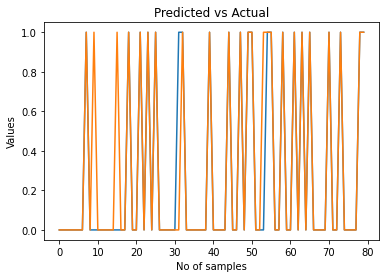

In [12]:
# Comparing true and predicted value using plot

plt.plot(y_test)
plt.plot(y_pred)
plt.title("Predicted vs Actual")
plt.xlabel("No of samples")
plt.ylabel("Values")
plt.show()

In [13]:
# import confusion_matrix and accuracy_score

from sklearn.metrics import confusion_matrix,accuracy_score
#confusion_matrix
cm = confusion_matrix(y_test,y_pred)

#accuracy_score
ac = accuracy_score(y_test,y_pred)


# print accuracy_score and confusion_matrix

print(ac)
print(cm)



0.95
[[55  3]
 [ 1 21]]




Testing through different values of k



In [14]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1,26)

# empty list to append scores
scores = []

# loop through k_range
for k in k_range:
    
    #Initiate KNN with n_neighbors as k
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    #Fitting model on training data
    knn.fit(X_train,y_train)
    
    #Predict on X_test
    y_pred = knn.predict(X_test)
    
    # We append the scores in the dictionary in list
    scores.append(accuracy_score(y_test,y_pred))
    
    
#print scores
print(scores)


[0.925, 0.925, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.925, 0.9375]


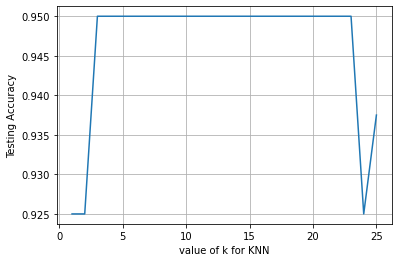

In [15]:
# plot the relationship between K and testing accuracy

plt.plot(k_range,scores)
plt.ylabel("Testing Accuracy")
plt.xlabel("value of k for KNN")
plt.grid()
plt.show()


    From above chart we can see that k value after 5 increases the accuracy and same accuracy is maintained till k=13. So our selected k value 5 is perfect to solve our problem.

### **Summary**

1. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.
2. In the case of classification and regression, choosing the right K for the data is done by trying several Ks and picking the one that works best.